# Exercise 1: Baseline Model Prediction

### Dataset Description
This dataset includes various property metrics crucial for analyzing real estate sales, features, and pricing. Dataset comes from Real Estate Transaction Records. Our object is to predict **SalePrice**.

- **BedroomAbvGr**: Bedrooms above grade (does NOT include basement bedrooms)
- **KitchenAbvGr**: Kitchens above grade
- **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)
- **Fireplaces**: Number of fireplaces
- **GarageYrBlt**: Year garage was built
- **GarageCars**: Size of garage in car capacity
- **GarageArea**: Size of garage in square feet
- **WoodDeckSF**: Wood deck area in square feet
- **OpenPorchSF**: Open porch area in square feet
- **EnclosedPorch**: Enclosed porch area in square feet
- **3SsnPorch**: Three season porch area in square feet
- **ScreenPorch**: Screen porch area in square feet
- **PoolArea**: Pool area in square feet
- **MiscVal**: Value of miscellaneous feature
- **MoSold**: Month Sold (MM)
- **YrSold**: Year Sold (YYYY)
- **SalePrice**: Price of sale (target variable)


### Data Collection

In [ ]:
import requests

# URLs of the files
train_data_url = 'https://www.raphaelcousin.com/modules/module3/exercise/module3_exercise_train.csv'
test_data_url = 'https://www.raphaelcousin.com/modules/module3/exercise/module3_exercise_test.csv'

# Function to download a file
def download_file(url, file_name):
    response = requests.get(url)
    response.raise_for_status()  # Ensure we notice bad responses
    with open(file_name, 'wb') as file:
        file.write(response.content)
    print(f'Downloaded {file_name} from {url}')

# Downloading the files
download_file(train_data_url, 'module3_exercise_train.csv')
download_file(test_data_url, 'module3_exercise_test.csv')

### Data Overview

In [110]:
import pandas as pd
import numpy as np
train =  pd.read_csv("module3_exercise_train.csv", sep=",", index_col='id')
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 254 to 1126
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BedroomAbvGr   1168 non-null   int64  
 1   KitchenAbvGr   1168 non-null   int64  
 2   TotRmsAbvGrd   1167 non-null   float64
 3   Fireplaces     1168 non-null   int64  
 4   GarageYrBlt    1168 non-null   float64
 5   GarageCars     1167 non-null   object 
 6   GarageArea     1168 non-null   int64  
 7   WoodDeckSF     1168 non-null   int64  
 8   OpenPorchSF    1168 non-null   int64  
 9   EnclosedPorch  1168 non-null   int64  
 10  3SsnPorch      1168 non-null   int64  
 11  ScreenPorch    1168 non-null   int64  
 12  PoolArea       1168 non-null   int64  
 13  MiscVal        1168 non-null   int64  
 14  MoSold         1168 non-null   int64  
 15  YrSold         1167 non-null   float64
 16  SalePrice      1168 non-null   int64  
dtypes: float64(3), int64(13), object(1)
memory usage: 164.2

In [111]:
test = pd.read_csv("module3_exercise_test.csv", sep=",", index_col='id')
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 292 entries, 892 to 722
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BedroomAbvGr   292 non-null    int64  
 1   KitchenAbvGr   292 non-null    int64  
 2   TotRmsAbvGrd   292 non-null    int64  
 3   Fireplaces     291 non-null    float64
 4   GarageYrBlt    292 non-null    float64
 5   GarageCars     292 non-null    object 
 6   GarageArea     292 non-null    int64  
 7   WoodDeckSF     292 non-null    int64  
 8   OpenPorchSF    292 non-null    int64  
 9   EnclosedPorch  291 non-null    float64
 10  3SsnPorch      292 non-null    int64  
 11  ScreenPorch    292 non-null    int64  
 12  PoolArea       292 non-null    int64  
 13  MiscVal        292 non-null    int64  
 14  MoSold         292 non-null    int64  
 15  YrSold         292 non-null    int64  
dtypes: float64(3), int64(12), object(1)
memory usage: 38.8+ KB


In [112]:
train[train.isnull().any(axis=1)]

,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
id,,,,,,,,,,,,,,,,,
1189,3,1,6.0,0,1966.0,NaN,408,0,0,0,0,0,0,0,12,2008.0,109900
135,2,1,6.0,0,1981.0,one,308,0,176,0,0,0,0,0,6,NaN,120000
321,2,1,NaN,1,1948.0,one,240,0,130,0,0,0,0,0,11,2007.0,119200


In [113]:
train[train.duplicated(keep=False)].sort_values(by=train.columns.tolist())

,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
id,,,,,,,,,,,,,,,,,
1057,3,1,7.0,0,2004.0,two,380,0,40,0,0,0,0,0,4,2006.0,130000
1389,3,1,7.0,0,2004.0,two,380,0,40,0,0,0,0,0,4,2006.0,130000


In [114]:
test[test.isnull().any(axis=1)]

,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
id,,,,,,,,,,,,,,,,
598,2,1,6,NaN,2005.0,two,556,203,47,0.0,0,0,0,0,8,2007
651,4,2,8,1.0,1999.0,two,672,344,0,NaN,0,0,0,0,5,2010


In [115]:
test[test.duplicated(keep=False)].sort_values(by=test.columns.tolist())

,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
id,,,,,,,,,,,,,,,,


### Data Preprocessing

In [116]:
train=train.drop_duplicates()
train_size=len(train)

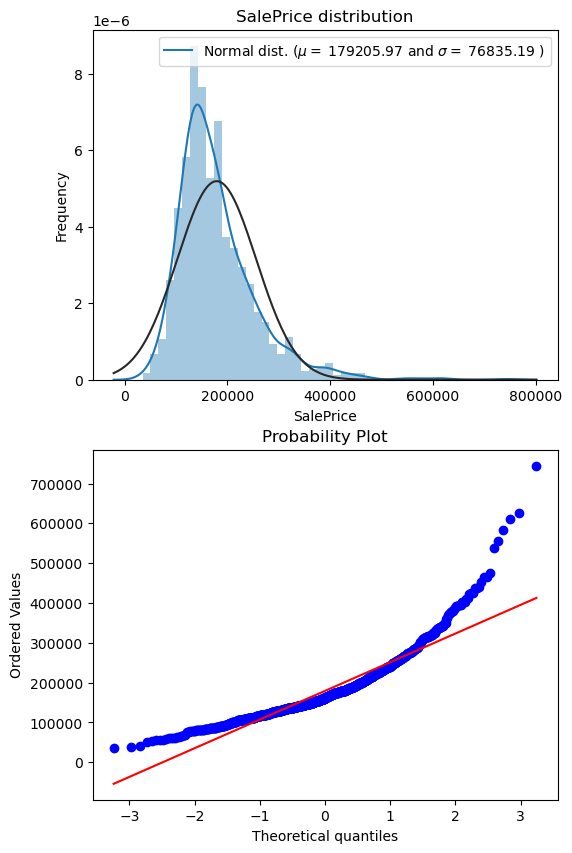

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew 
from scipy import stats
fig, ax = plt.subplots(nrows=2, figsize=(6, 10))
sns.distplot(train['SalePrice'], fit=norm, ax=ax[0])
(mu, sigma) = norm.fit(train['SalePrice'])
ax[0].legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
ax[0].set_ylabel('Frequency')
ax[0].set_title('SalePrice distribution')
stats.probplot(train['SalePrice'], plot=ax[1])
plt.show()

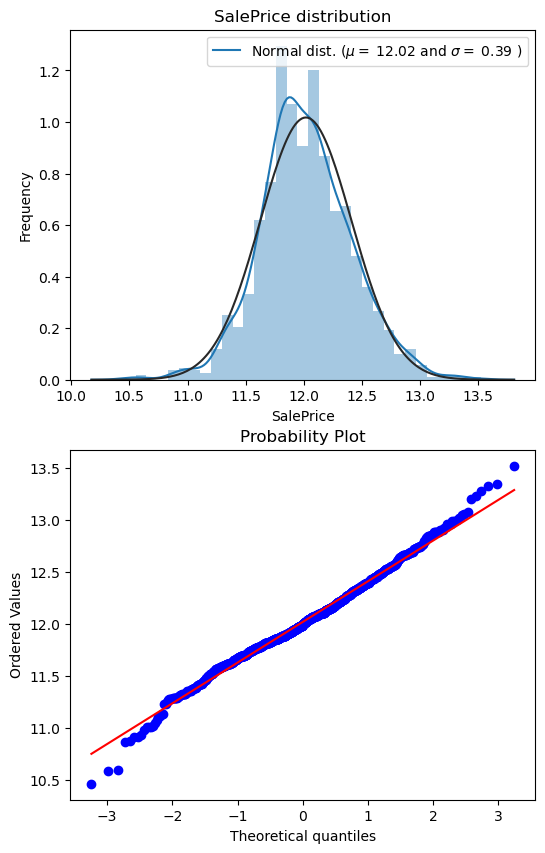

In [118]:
train["SalePrice"] = np.log1p(train["SalePrice"])
fig, ax = plt.subplots(nrows=2, figsize=(6, 10))
sns.distplot(train['SalePrice'], fit=norm, ax=ax[0])
(mu, sigma) = norm.fit(train['SalePrice'])
ax[0].legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
ax[0].set_ylabel('Frequency')
ax[0].set_title('SalePrice distribution')
stats.probplot(train['SalePrice'], plot=ax[1])
plt.show()

In [119]:
all_data = pd.concat((train, test))
all_data.drop("SalePrice",axis=1, inplace=True)
y_train=train["SalePrice"]

In [120]:
import warnings
warnings.filterwarnings("ignore")  
#change the label of "GarageCars" into integer
all_data.loc[all_data["GarageCars"]=='zero',"GarageCars"]=0
all_data.loc[all_data["GarageCars"]=='one',"GarageCars"]=1
all_data.loc[all_data["GarageCars"]=='two',"GarageCars"]=2
all_data.loc[all_data["GarageCars"]=='three',"GarageCars"]=3
all_data.loc[all_data["GarageCars"]=='four',"GarageCars"]=4
#fill all nan with value -1
all_data["GarageCars"]=pd.to_numeric(all_data["GarageCars"])
all_data.fillna(-1,inplace=True)
all_data.loc[all_data['TotRmsAbvGrd']==-1,'TotRmsAbvGrd']=all_data['TotRmsAbvGrd'].median()
all_data.loc[all_data['GarageYrBlt']==-1,'GarageYrBlt']=all_data['GarageYrBlt'].median()
all_data.loc[all_data['GarageCars']==-1,'GarageCars']=all_data['GarageCars'].median()
all_data.loc[all_data['YrSold']==-1,'YrSold']=all_data['YrSold'].median()
all_data.loc[all_data['Fireplaces']==-1,'Fireplaces']=all_data['Fireplaces'].median()
all_data.loc[all_data['EnclosedPorch']==-1,'EnclosedPorch']=all_data['EnclosedPorch'].median()
#transfer all the values to integers
all_data['TotRmsAbvGrd']=all_data['TotRmsAbvGrd'].astype('int64')
all_data['GarageYrBlt']=all_data['GarageYrBlt'].astype('int64')
all_data['YrSold']=all_data['YrSold'].astype('int64')
all_data["GarageCars"]=all_data["GarageCars"].astype('int64')
all_data['Fireplaces']=all_data['Fireplaces'].astype('int64')
all_data['GarageYrBlt']=all_data['GarageYrBlt'].astype('int64')
all_data['EnclosedPorch']=all_data['EnclosedPorch'].astype('int64')
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 254 to 722
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   BedroomAbvGr   1459 non-null   int64
 1   KitchenAbvGr   1459 non-null   int64
 2   TotRmsAbvGrd   1459 non-null   int64
 3   Fireplaces     1459 non-null   int64
 4   GarageYrBlt    1459 non-null   int64
 5   GarageCars     1459 non-null   int64
 6   GarageArea     1459 non-null   int64
 7   WoodDeckSF     1459 non-null   int64
 8   OpenPorchSF    1459 non-null   int64
 9   EnclosedPorch  1459 non-null   int64
 10  3SsnPorch      1459 non-null   int64
 11  ScreenPorch    1459 non-null   int64
 12  PoolArea       1459 non-null   int64
 13  MiscVal        1459 non-null   int64
 14  MoSold         1459 non-null   int64
 15  YrSold         1459 non-null   int64
dtypes: int64(16)
memory usage: 193.8 KB


In [121]:
all_data["AgeSale"]=all_data["YrSold"]-all_data["GarageYrBlt"]
all_data.drop(["GarageYrBlt","MoSold","YrSold"],axis=1, inplace=True)
all_data

,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,AgeSale
id,,,,,,,,,,,,,,
254,2,1,4,1,2,440,0,55,0,0,165,0,0,33
1066,1,1,5,1,2,612,349,40,0,0,0,0,0,26
638,4,1,10,1,2,420,144,123,0,0,0,0,0,8
799,3,1,8,0,1,180,0,0,0,140,0,0,0,93
380,2,1,5,0,2,438,108,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,4,1,10,1,1,336,272,0,42,0,116,0,0,41
1361,3,1,8,0,2,500,144,68,0,0,0,0,0,4
802,3,1,7,1,2,577,0,211,0,0,0,0,0,6


### Model Building and Evaluation

In [122]:
from sklearn.datasets import make_classification
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [123]:
X_train = all_data[:train_size]
X_test = all_data[train_size:]

In [124]:
n_folds = 5
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train)
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=kf))
    return(rmse)

In [ ]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=1))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
GBoost = GradientBoostingRegressor() 
model_xgb = xgb.XGBRegressor()
model_lgb = lgb.LGBMRegressor()

In [ ]:
models = {'Lasso': lasso, 'ElasticNet': ENet, 'Kernel Ridge': KRR, 
          'Gradient Boosting': GBoost, 'XGBoost': model_xgb, 'LightGBM': model_lgb}
for model_name, model in models.items():
    score = rmsle_cv(model)
    print("{}: {:.4f} ({:.4f})\n".format(model_name, score.mean(), score.std()))

Lasso: 0.2288 (0.0270)

ElasticNet: 0.2288 (0.0270)

Kernel Ridge: 0.9958 (1.5031)

Gradient Boosting: 0.2124 (0.0115)

XGBoost: 0.2286 (0.0087)

LightGBM: 0.2176 (0.0105)

RamdomForest: 0.2157 (0.0083)



In [127]:
from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
param_space = {
    'learning_rate': Real(0.05,0.1),
    'n_estimators': Integer(100,1000),
    'max_depth': Integer(3, 5),
}
opt_reg = BayesSearchCV(lgb.LGBMRegressor(),param_space,scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=0)
opt_reg.fit(X_train, y_train)
results=opt_reg.cv_results_
order=np.argsort(results['mean_test_score'])
best_scores=results['mean_test_score'][order]
best_params=[results['params'][index] for index in order]
n=5
for i in range(n):
    print('params:',best_params[-(i+1)],)
    print('eval score:',-best_scores[-(i+1)])
print("Best parameters (regression):", opt_reg.best_params_)
print("Best cross-validation score (regression):", -opt_reg.best_score_)

params: OrderedDict({'learning_rate': 0.05192250329110156, 'max_depth': 4, 'n_estimators': 101})
eval score: 0.043803409677936916
params: OrderedDict({'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 215})
eval score: 0.04380650238428653
params: OrderedDict({'learning_rate': 0.050639513660499125, 'max_depth': 3, 'n_estimators': 108})
eval score: 0.04384340662767735
params: OrderedDict({'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100})
eval score: 0.04386365832122578
params: OrderedDict({'learning_rate': 0.05055907469010051, 'max_depth': 3, 'n_estimators': 312})
eval score: 0.04393159227348611
Best parameters (regression): OrderedDict({'learning_rate': 0.05192250329110156, 'max_depth': 4, 'n_estimators': 101})
Best cross-validation score (regression): 0.043803409677936916


In [132]:
model=lgb.LGBMRegressor(learning_rate=0.05192250329110156, max_depth=4, n_estimators=101)
model.fit(X_train,y_train)
y_test_pred=np.expm1(model.predict(X_test))
y_test=pd.DataFrame(y_test_pred,columns=['SalePrice'],index=test.index)
y_test

,SalePrice
id,
892,289163.167801
1105,202019.595841
413,171457.004145
522,187199.942571
1036,177618.954699
...,...
479,186677.905219
1361,201808.802676
802,217080.037075


In [133]:
y_test.to_csv("submission.csv")